<a href="https://colab.research.google.com/github/rohailkhan/Machine_learning_Python/blob/master/2_Boston_Housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM - per capita crime rate by town**

**ZN - proportion of residential land zoned for lots over 25,000 sq.ft.**

**INDUS - proportion of non-retail business acres per town.**

**CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)**

**NOX - nitric oxides concentration (parts per 10 million)**

**RM - average number of rooms per dwelling**

**AGE - proportion of owner-occupied units built prior to 1940**

**DIS - weighted distances to five Boston employment centres**

**RAD - index of accessibility to radial highways**

**TAX - full-value property-tax rate per $10,000**

**PTRATIO - pupil-teacher ratio by town**

**B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town**

**LSTAT - % lower status of the population**

## **Trget column -->> MEDV - Median value of owner-occupied homes in $1000's**


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='https://raw.githubusercontent.com/rohailkhan/data/main/BostonHousing.csv'
housing=pd.read_csv(path)
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.shape

(506, 14)

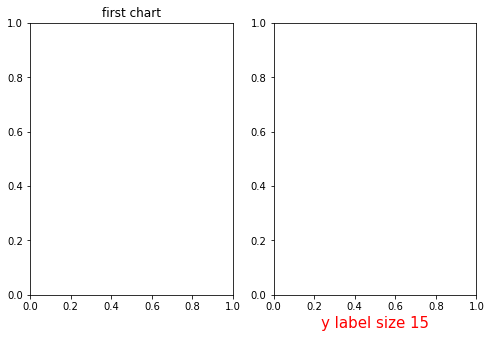

In [ ]:

fig, axes = plt.subplots( 1,2, figsize=(8,5)) # matplot part for defining figure and no of axes(plots)

axes[0].set_title('first chart')
axes[1].set_xlabel('y label size 15',color='r',size=15)
plt.show()

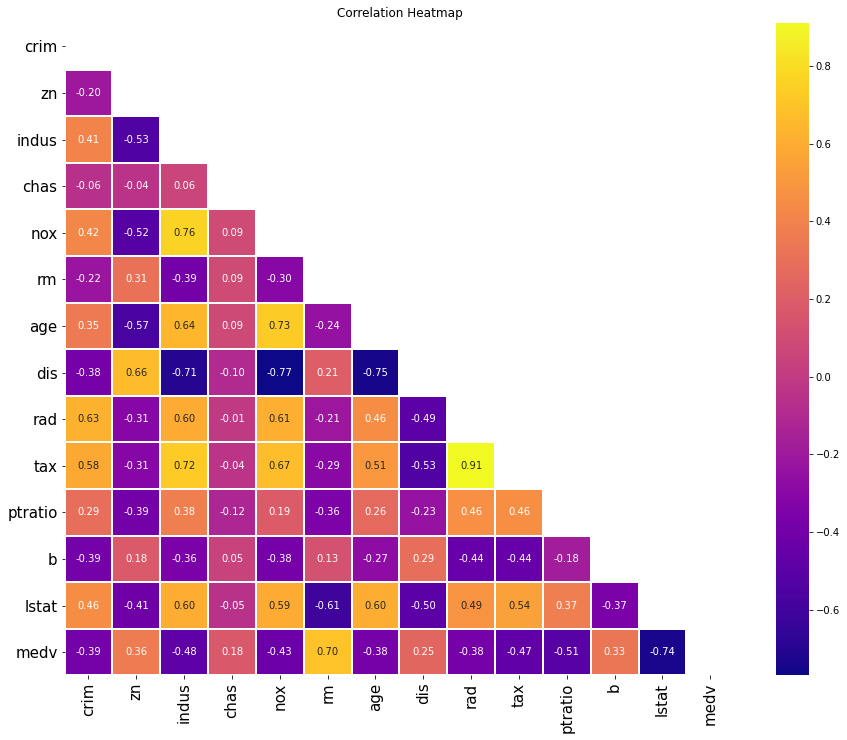

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(housing.corr())
# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(housing.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')

plt.yticks(rotation = 0,size=15)
plt.xticks(rotation = 90,size=15)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Y=housing.iloc[:,13]
X=housing.iloc[:,0:13]

In [ ]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Step-1 Checking performance of different ML algorithms
1. LG
2. Deci

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

In [ ]:
# for standerdization
from sklearn.preprocessing import StandardScaler
# for kfold cross validation
from sklearn.model_selection import StratifiedKFold ,KFold
#for kfold cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# for pipeline
from sklearn.pipeline import Pipeline

In [ ]:
seed=8

In [ ]:
# We have to standerdize and then use the ML algorithm using Pipeline in this format
# Pipeline(steps=[(scaling) , (ML model)] )
# steps = ('Name' , Pipeline() )

In [ ]:
ml_models=[]
# tuples of scaled ml models

ScaledLR=('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())]))
ScaleDTR= ('ScaleDTR', Pipeline([('Scaler', StandardScaler()), ('DTR', DecisionTreeRegressor())]))

# ScaledLDA=('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())]))
# ScaledKNN=('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]))
# ScaledCART=('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())]))
# ScaledNB=('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())]))
# ScaledSVC=('ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())]))


In [ ]:
# ml_models=[ScaledLR,ScaledLDA,ScaledKNN,ScaledCART , ScaledNB ,ScaledSVC]
ml_models=[ScaledLR , ScaleDTR]

In [ ]:
k_fold_object= KFold(n_splits=10, random_state=seed, shuffle=True)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error ,SCORERS

In [ ]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
results=[]
names=[]
for name , model in ml_models:
  cv_results = cross_val_score(model, X, Y, cv=k_fold_object, scoring='neg_mean_absolute_error') 
  
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -3.399122 (0.536452)
ScaleDTR: -2.916118 (0.650329)


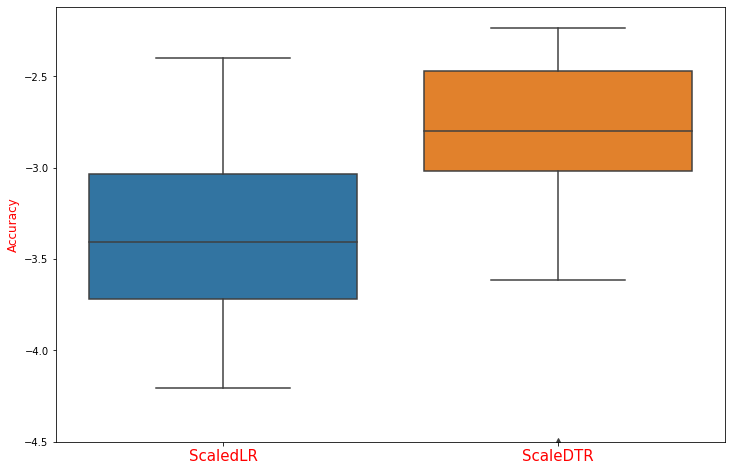

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=results)
ax.set_ylabel('Accuracy', color='r',size=12)
ax.set_ylim(ymin=-4.5)
plt.xticks([0,1],names, color='r',size=15)
plt.show()

In [ ]:
ml_models=[ScaledLR,ScaledCART ]